In [7]:
"""
I-Nergy | AI Assets - Synthetic Dataset Creation

=================================

__author__: RM
__reviewer__: VB
__month__: 09/2022

2022 MIPU - Open source code

"""

'\nI-Nergy | AI Assets - Synthetic Dataset Creation\n\n=================================\n\n__author__: RM\n__reviewer__: VB\n__month__: 09/2022\n\n2022 MIPU - Open source code\n\n'

In [8]:
#Data analysis
import pdb
import pandas as pd
import os
import matplotlib.pyplot as plt    
import pickle 
import numpy as np
from datetime import datetime, date, timedelta

#Modeling
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

#General
from os import walk
from joblib import dump, load



In [9]:
def mipu_colors(N):
    all_colors=['#16679C','#00B398','#C9609F','#FF7F50','#219AE9','#BDD48D','#EE6F90','#FFBD69']
    color=all_colors[N]
    return(color)
all_colors=['#16679C','#00B398','#C9609F','#FF7F50','#219AE9','#BDD48D','#EE6F90','#FFBD69']

def bestmodel(X_train, y_train,X_test, y_test,gridsearch=True):
    """Finds the best pipeline for the data provided within regressors, using gridsearch or randomizedsearch""" 
    # Initialize the estimators
    reg1=ExtraTreesRegressor(random_state=42)
    reg2 = RandomForestRegressor(random_state=42)
    reg3=XGBRegressor(random_state=42,gamma=0,scale_pos_weight=1,validation_fraction=0.1)
    reg4= MLPRegressor(validation_fraction=0.1, n_iter_no_change=10, max_iter=200, tol=0.001)
    
    #Algorithm settings
    settings1={'regressor__n_estimators':[50,100,150,200],'regressor__max_depth':[8,9,10,11,12], 'regressor__min_samples_split':[3, 5, 7],'regressor':[reg1]}
    settings2 = {'regressor__n_estimators':[40,50,70,80,100], 'regressor__max_depth':[8,9,10,11,12], 'regressor__min_samples_split':[3, 5, 7],'regressor':[reg2]}
    settings3 = {'regressor__max_depth':[8,9,10,11,12], 'regressor__min_child_weight':[2,3,5],'regressor__n_estimators':[50,100,150],\
        'regressor__learning_rate':[0.5,0.2,0.1,0.05],'regressor':[reg3]}
    settings4 = {'regressor__activation':['relu','sigmoid'], 'regressor__solver':['lbfgs','adam'], 'regressor__alpha':[1.e-3,1,100],\
                'regressor__hidden_layer_sizes':[(30,),(40,),(50,),(60,),(70,),(80,),(90,),(100,),(110,),(120,),(50,50),(60,60),(70,70)], 'regressor__warm_start':[True],'regressor':[reg4]}

    #Final pipeline
    params = [settings1, settings2, settings3,settings4]
    pipe = Pipeline([\
        ('scl', StandardScaler()),\
        ('regressor', reg1)])

    #Model search
    if gridsearch==True:
        #With gridsearch:
        gs=GridSearchCV(pipe, params, cv=3, n_jobs=-1, scoring='neg_mean_absolute_percentage_error',verbose=-1).fit(X_train, y_train)
    else:
        #With Random search:
        gs=RandomizedSearchCV(pipe, params, cv=3, n_jobs=-1, scoring='neg_mean_absolute_percentage_error',verbose=-1).fit(X_train, y_train)
    
    
    my_params = gs.best_params_
    print('Best algorithm:\n', gs.best_params_['regressor'])
    print('Best params:\n', gs.best_params_)
    alg=gs.best_estimator_
    print('GridSearchCV accuracy:\n', gs.score(X_test, y_test))
    print('MSE: {}'.format(np.round(gs.score(X_test, y_test),2)))
    print('MAPE: {}'.format(np.round(mean_absolute_percentage_error(y_test,alg.predict(X_test)),2)))
    print('R2: {}'.format(np.round(r2_score(y_test,alg.predict(X_test)),2)))
    sigma=np.std(y_test-alg.predict(X_test))
    print('Sigma: {}'.format(sigma))
    return(alg,gs.score(X_test, y_test))


In [10]:
name='Temps.csv'
df = pd.read_csv(name)
df.set_index('time', inplace = True)
df.index = pd.to_datetime(df.index)



In [11]:
dict_modelli = {}
for col in df.columns[:-1]:
    print(col)

    XX = df.drop(columns = col)
    X = XX.iloc[:round(len(XX)*0.8), :]
    y = df.iloc[:round(len(df)*0.8), :][col]


    X_train,X_validation,y_train,y_validation=\
    train_test_split(X,y,test_size=0.30,random_state=42)


    X_test = XX.iloc[round(len(XX)*0.8):]
    y_test = df.iloc[round(len(XX)*0.8):][col]
    
    modello = bestmodel(X_train, y_train, X_test, y_test)[0]
    pred_validation = modello.predict(X_validation)
    pred_test = modello.predict(X_test)

    dict_modelli[col] = {}
    dict_modelli[col]['Modello'] = modello
    dict_modelli[col]['X_test'] = X_test
    dict_modelli[col]['X_validation'] = X_validation
    dict_modelli[col]['pred_test'] = pred_test
    dict_modelli[col]['pred_validation'] = pred_validation
    dict_modelli[col]['y_test'] = y_test
    dict_modelli[col]['y_validation'] = y_validation
    # dict_modelli[col]['Best Params'] = modello.best_params_
    dict_modelli[col][f"{col}'"] = modello.predict(XX)

Temperature_B


c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
234 fits failed out of a total of 1413.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimato

[09:27:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best algorithm:
 XGBRegressor(max_depth=10, min_child_weight=2, random_state=42,
             validation_fraction=0.1)
Best params:
 {'regressor': XGBRegressor(max_depth=10, min_child_weight=2, random_state=42,
             validation_fraction=0.1), 'regressor__learning_rate': 0.1, 'regressor__max_depth': 10, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 100}
GridSearchCV accuracy:
 -0.007309781052263087
MSE: -0.01
MAPE: 0.01
R2: 1.0
Sigma: 0.7735655854558168
Temperature_D


c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
234 fits failed out of a total of 1413.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimato

[09:30:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best algorithm:
 XGBRegressor(learning_rate=0.05, max_depth=12, min_child_weight=2,
             n_estimators=150, random_state=42, validation_fraction=0.1)
Best params:
 {'regressor': XGBRegressor(learning_rate=0.05, max_depth=12, min_child_weight=2,
             n_estimators=150, random_state=42, validation_fraction=0.1), 'regressor__learning_rate': 0.05, 'regressor__max_depth': 12, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 150}
GridSearchCV accuracy:
 -0.011040103312034021
MSE: -0.01
MAPE: 0.01
R2: 0.84
Sigma: 1.4758784629498853
Temperature_A


c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
234 fits failed out of a total of 1413.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimato

Best algorithm:
 ExtraTreesRegressor(max_depth=12, min_samples_split=3, n_estimators=150,
                    random_state=42)
Best params:
 {'regressor': ExtraTreesRegressor(max_depth=12, min_samples_split=3, n_estimators=150,
                    random_state=42), 'regressor__max_depth': 12, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 150}
GridSearchCV accuracy:
 -0.006531566288023644
MSE: -0.01
MAPE: 0.01
R2: 0.77
Sigma: 0.9991123325676619
Temperature_C


c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
234 fits failed out of a total of 1413.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
234 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mipu_10\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Mipu_10\AppData\Local\Programs\Python\Python3

[09:36:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best algorithm:
 XGBRegressor(learning_rate=0.05, max_depth=8, min_child_weight=2,
             n_estimators=150, random_state=42, validation_fraction=0.1)
Best params:
 {'regressor': XGBRegressor(learning_rate=0.05, max_depth=8, min_child_weight=2,
             n_estimators=150, random_state=42, validation_fraction=0.1), 'regressor__learning_rate': 0.05, 'regressor__max_depth': 8, 'regressor__min_child_weight': 2, 'regressor__n_estimators': 150}
GridSearchCV accuracy:
 -0.007028087780355987
MSE: -0.01
MAPE: 0.01
R2: 1.0
Sigma: 0.7182618931363894


In [12]:
d = 0
for i,col in enumerate(dict_modelli):
    
    X_test = dict_modelli[col]['X_test'] 
    X_validation = dict_modelli[col]['X_validation'] 
    pred_test = dict_modelli[col]['pred_test'] 
    pred_validation = dict_modelli[col]['pred_validation'] 
    y_test = dict_modelli[col]['y_test'] 
    y_validation = dict_modelli[col]['y_validation'] 

    Residui_validation = y_validation - pred_validation
    sigma = Residui_validation.std()
    Media = Residui_validation.mean()
    UCL = Media + 3*sigma
    LCL = Media - 3*sigma

    x = dict_modelli[col]['X_test'].index
    Residui = y_test - pred_test

    plt.figure(d,figsize = (20,10))
    plt.rcParams['axes.facecolor'] = '#333333'
    plt.title(f'REAL vs PREDICTED   Modello {i+1}: Variabile Target {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'Data', fontsize = 14, fontweight = 'bold')
    plt.ylabel(col, fontsize = 14, fontweight = 'bold')
    plt.plot(x[:100],y_test[:100], label = 'Reale', c = all_colors[i])
    plt.plot(x[:100], pred_test[:100], label= 'Predetto', c = 'orange', linestyle = '--')
    plt.legend(facecolor='white', fontsize = 14)
    d += 1

    plt.figure(d, figsize = (20,10))
    plt.title(f'RESIDUAL CHART    Modello {i+1}: Variabile Target {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'Data', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Residui', fontsize = 14, fontweight = 'bold')
    plt.plot(x[:100], Residui[:100], label = 'Residui', c = all_colors[i])
    plt.axhline(y = LCL, label= 'LCL', c = 'red')
    plt.axhline(y = UCL, label = 'UCL', c = 'red')
    plt.legend(facecolor='white', fontsize = 14)
    d += 1

    plt.figure(d, figsize = (20,10))
    plt.title(f'CUSUM    Modello {i+1}: Variabile Target {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'Data', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Cusum', fontsize = 14, fontweight = 'bold')
    plt.plot(x[:100], np.cumsum(Residui.values[:100]), label = 'Cusum', c = all_colors[i])
    plt.axhline(y = 0 , c = 'red')
    plt.legend(facecolor='white', fontsize = 14)
    d += 1
   


R2 = 0.9969409263957958
MAPE = 0.00538796915690839
R2 = 0.9601006574383221
MAPE = 0.008909865584106924
R2 = 0.9753904263259551
MAPE = 0.006500154519738358
R2 = 0.9959096679362496
MAPE = 0.006662004048163765


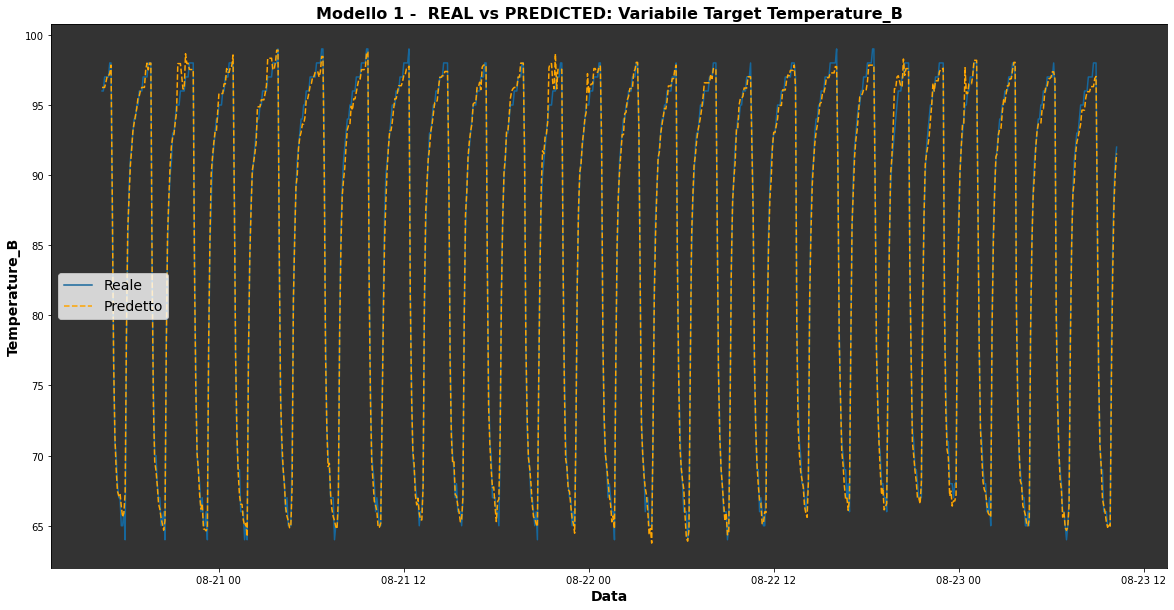

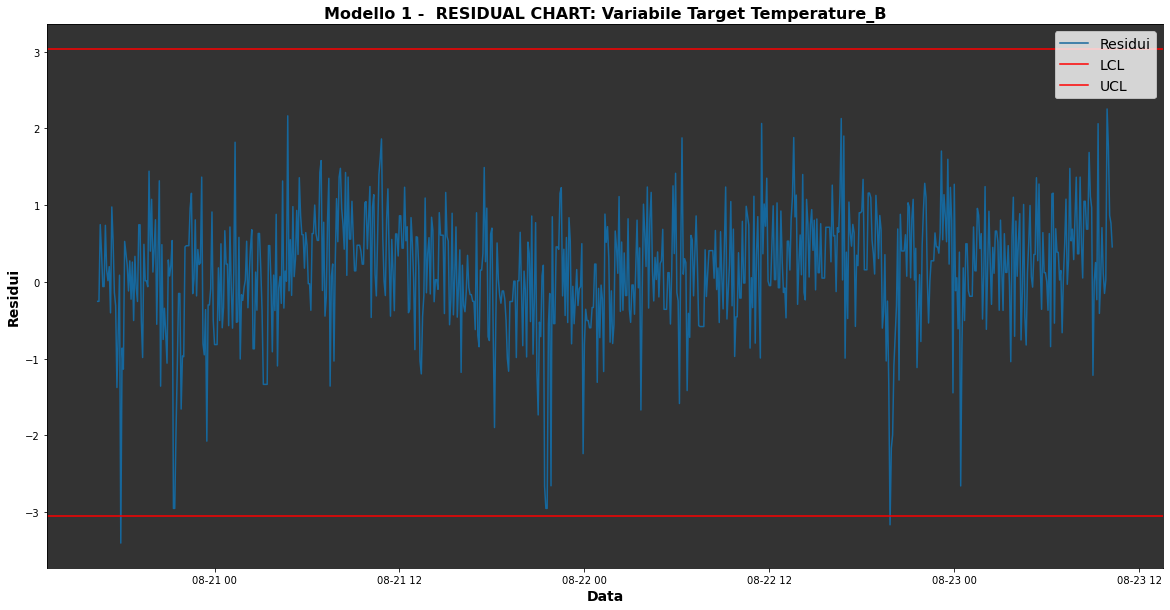

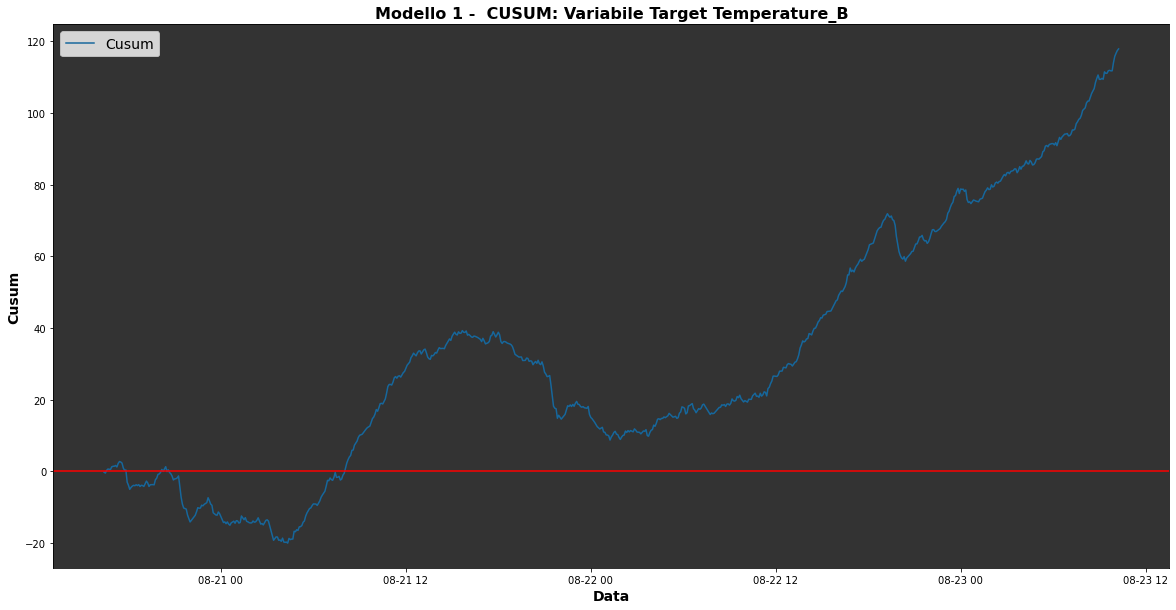

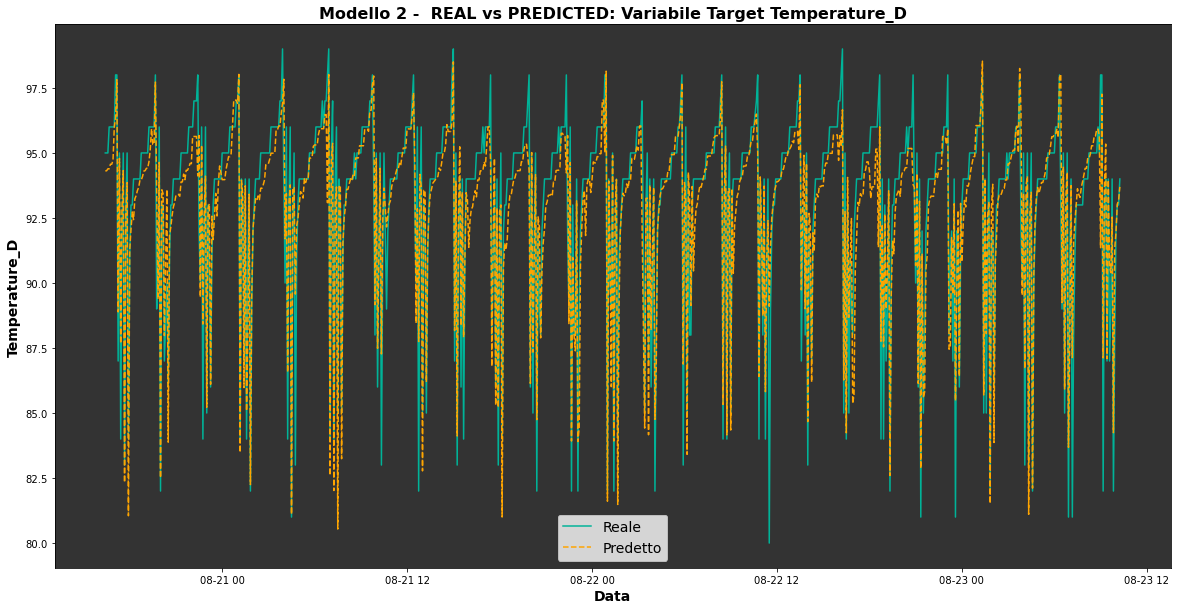

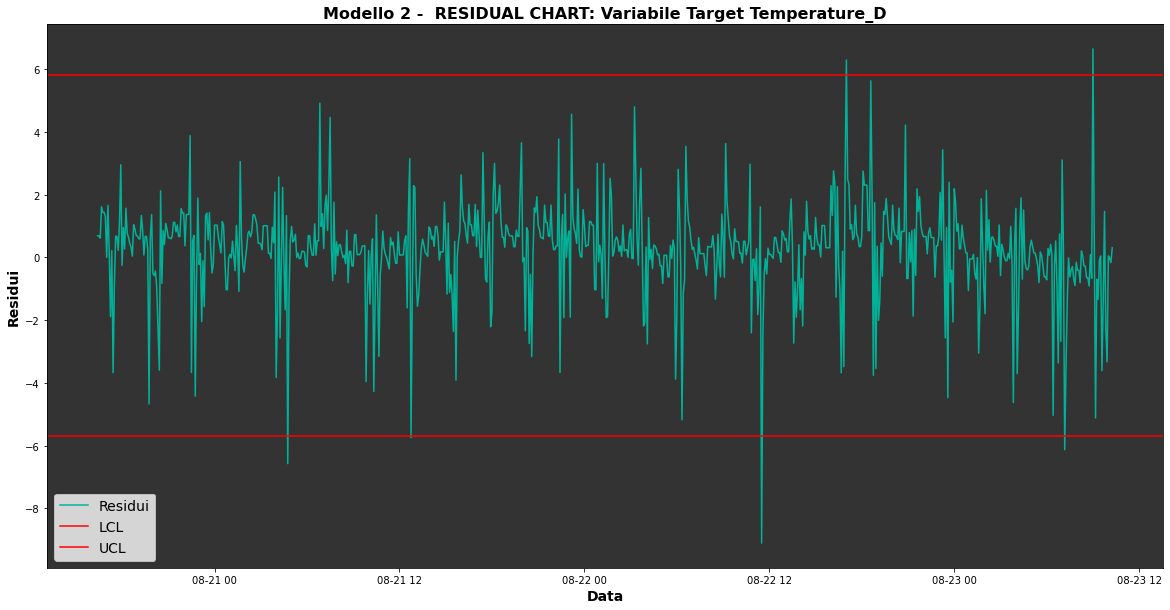

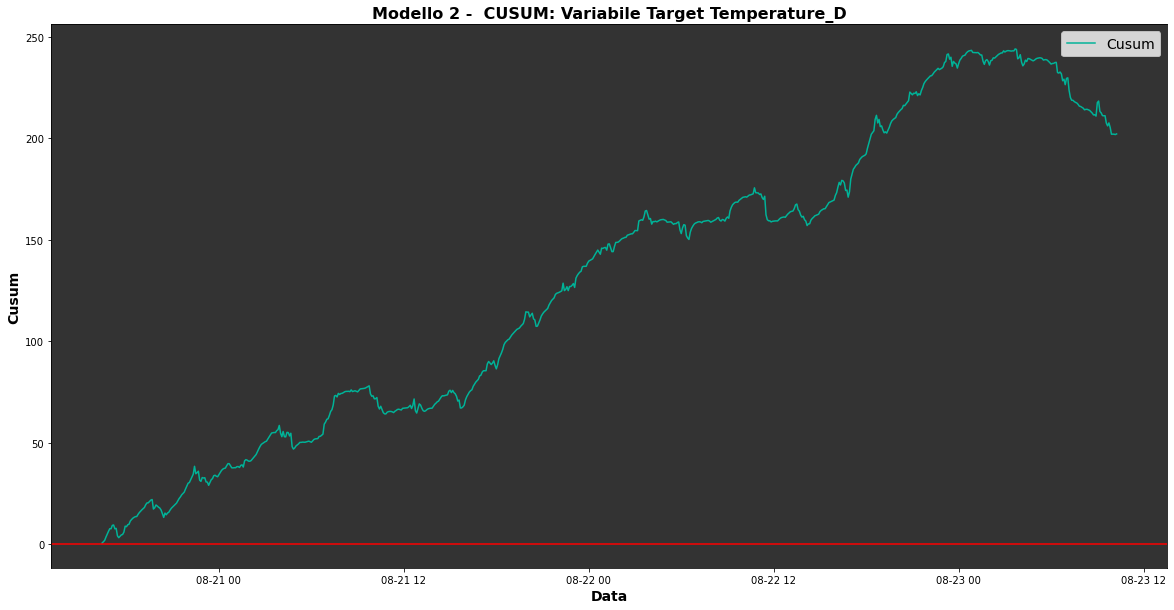

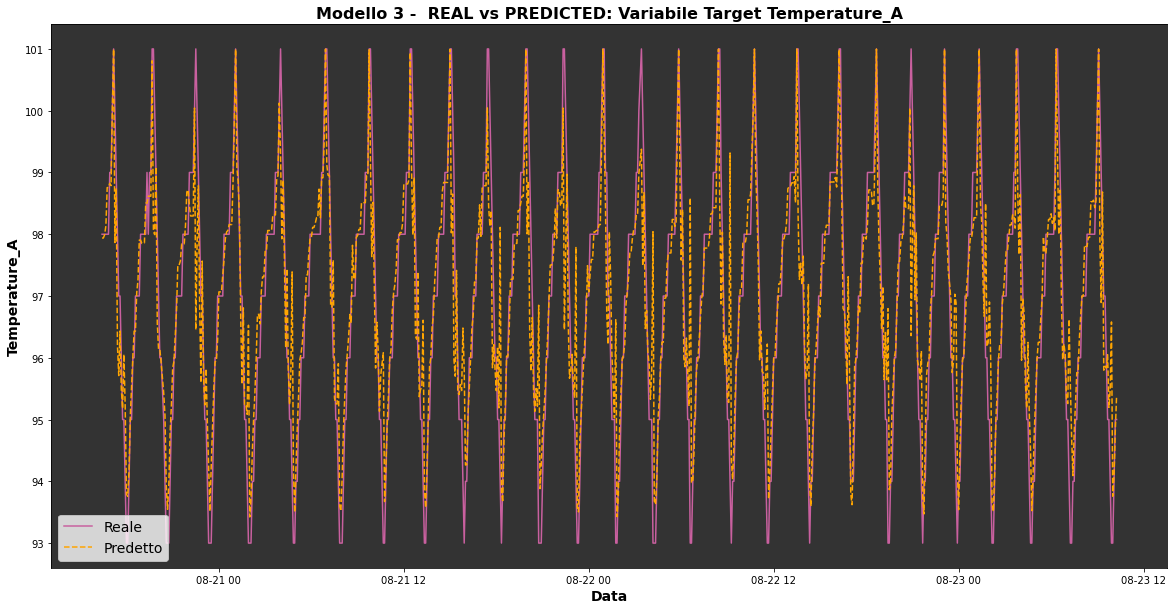

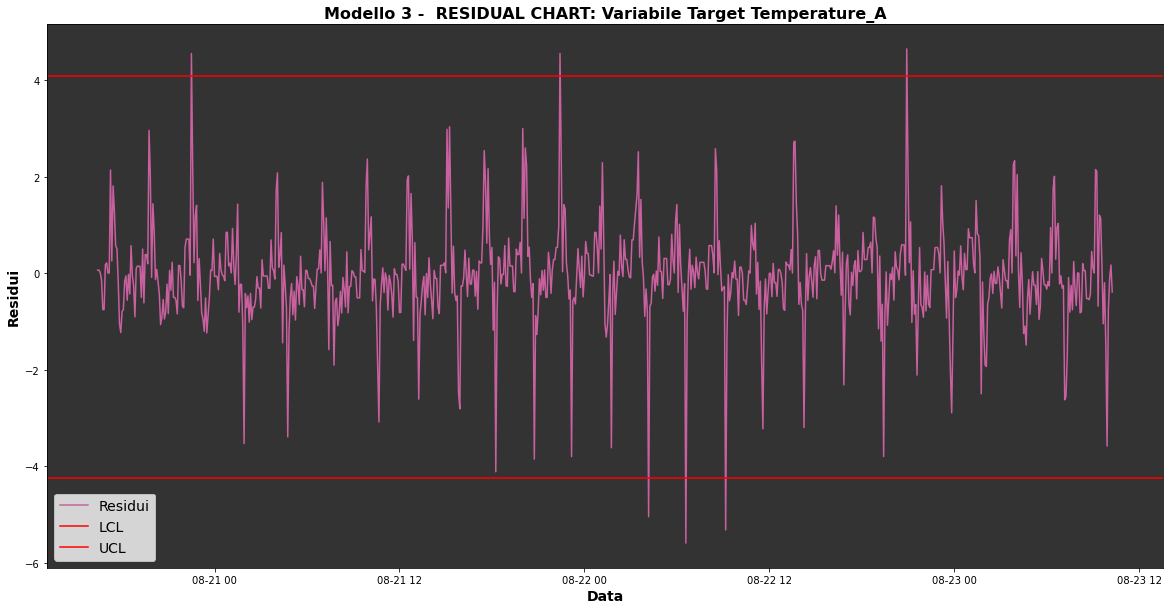

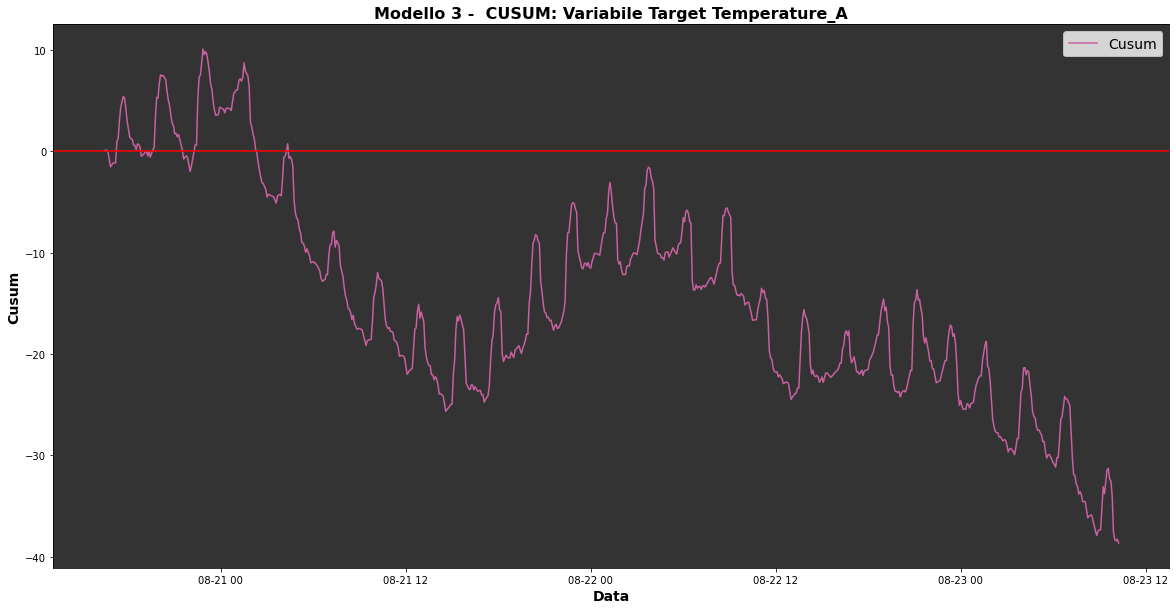

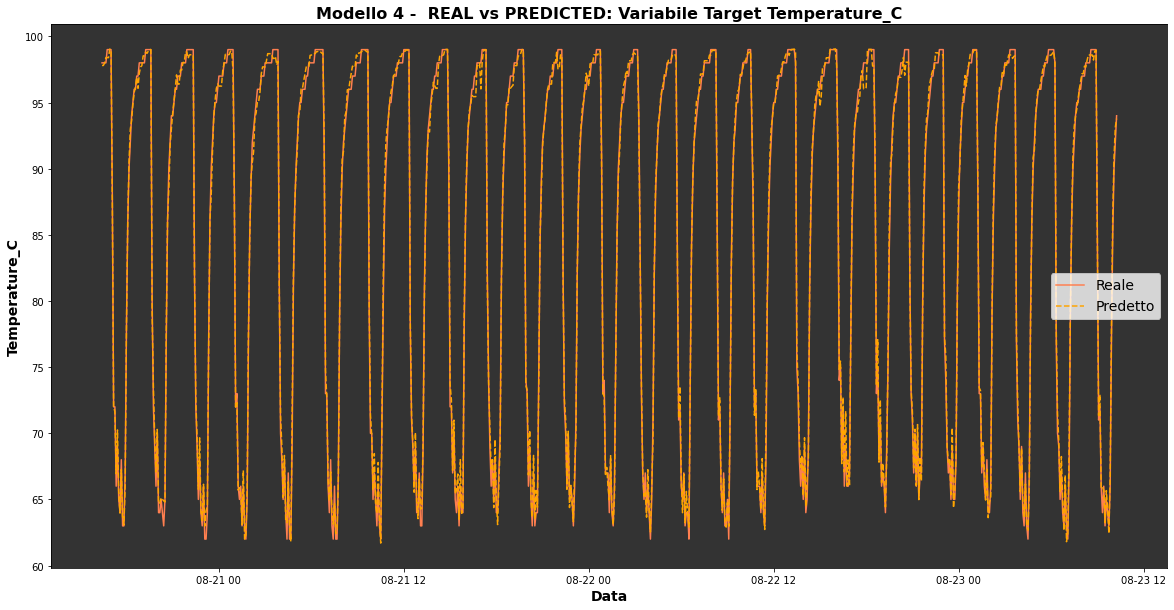

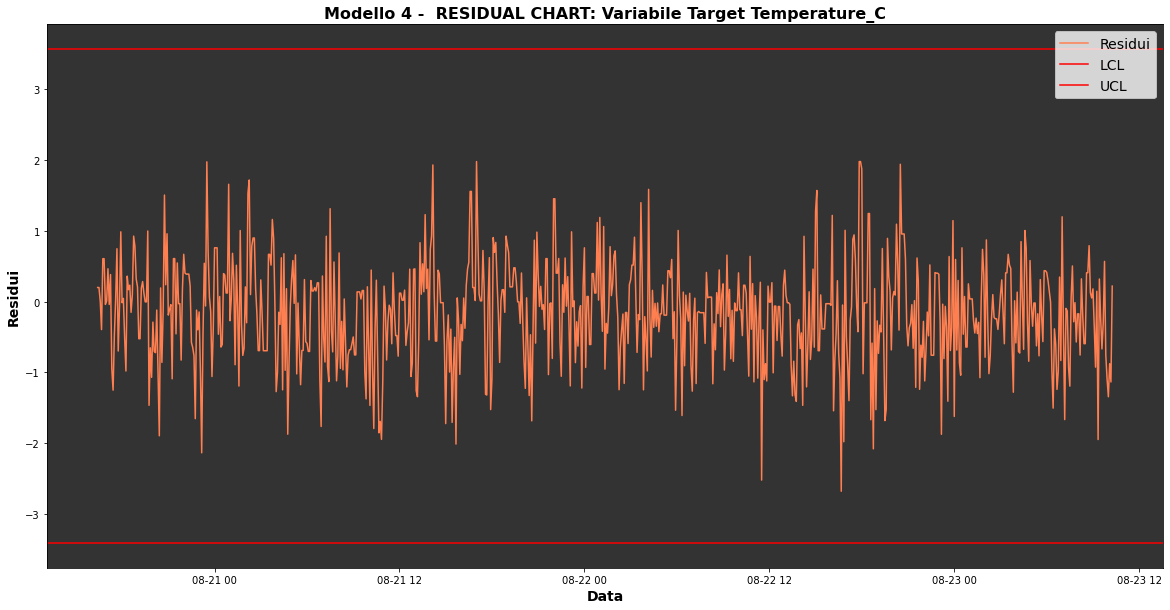

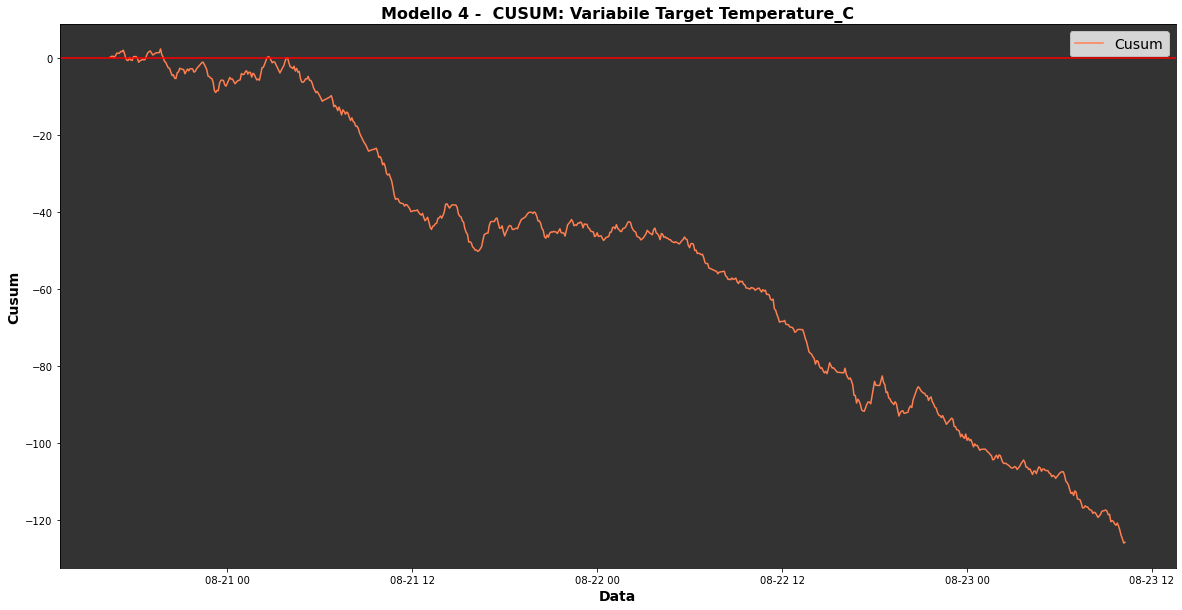

In [ ]:


d = 0
for i,col in enumerate(dict_modelli):
    
    X_test = dict_modelli[col]['X_test'] 
    X_validation = dict_modelli[col]['X_validation'] 
    pred_test = dict_modelli[col]['pred_test'] 
    pred_validation = dict_modelli[col]['pred_validation'] 
    y_test = dict_modelli[col]['y_test'] 
    y_validation = dict_modelli[col]['y_validation'] 

    Residui_validation = y_validation - pred_validation
    sigma = Residui_validation.std()
    Media = Residui_validation.mean()
    UCL = Media + 3*sigma
    LCL = Media - 3*sigma

    x = dict_modelli[col]['X_test'].index
    Residui = y_test - pred_test

    pred = dict_modelli[col][f"{col}'"]
    print(f'R2 = {r2_score(df[col], pred )}')
    print(f'MAPE = {MAPE(df[col], pred )}')

    #REAL VS PREDICTED
    plt.figure(d,figsize = (20,10))
    plt.rcParams['axes.facecolor'] = '#333333'
    plt.title(f'Modello {i+1} -  REAL vs PREDICTED: Variabile Target {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'Data', fontsize = 14, fontweight = 'bold')
    plt.ylabel(col, fontsize = 14, fontweight = 'bold')
    plt.plot(x,y_test, label = 'Reale', c = all_colors[i])
    plt.plot(x, pred_test, label= 'Predetto', c = 'orange', linestyle = '--')
    plt.legend(facecolor='white', fontsize = 14)
    d += 1

    # RESIDUAL CHART
    plt.figure(d, figsize = (20,10))
    plt.title(f'Modello {i+1} -  RESIDUAL CHART: Variabile Target {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'Data', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Residui', fontsize = 14, fontweight = 'bold')
    plt.plot(x, Residui, label = 'Residui', c = all_colors[i])
    plt.axhline(y = LCL, label= 'LCL', c = 'red')
    plt.axhline(y = UCL, label = 'UCL', c = 'red')
    plt.legend(facecolor='white', fontsize = 14)
    d += 1

    # CUSUM CHART
    plt.figure(d, figsize = (20,10))
    plt.title(f'Modello {i+1} -  CUSUM: Variabile Target {col}', fontsize = 16, fontweight = 'bold')
    plt.xlabel(f'Data', fontsize = 14, fontweight = 'bold')
    plt.ylabel('Cusum', fontsize = 14, fontweight = 'bold')
    plt.plot(x, np.cumsum(Residui.values), label = 'Cusum', c = all_colors[i])
    plt.axhline(y = 0 , c = 'red')
    plt.legend(facecolor='white', fontsize = 14)
    d += 1



In [ ]:
# synthetic dataset
DF = df.copy()

for col in DF.iloc[:,:-1]:
    new_col = dict_modelli[col][f"{col}'"]
    DF[col] = new_col
DF.to_excel('Transformer_Synthetic temperatures data.xlsx')

,Temperature_B,Temperature_D,Temperature_A,Temperature_C,hour
time,,,,,
2022-08-09 13:00:00,94.817673,95.839485,95.517454,89.837463,13
2022-08-09 13:05:00,98.794708,95.839485,92.232768,90.289803,13
2022-08-09 13:10:00,98.942497,95.989197,91.960117,90.289803,13
2022-08-09 13:15:00,93.687660,95.050255,92.693809,84.087242,13
2022-08-09 13:20:00,96.946632,95.996704,92.638151,88.260597,13
...,...,...,...,...,...
2022-08-23 09:55:00,75.745872,91.330582,96.579824,78.093872,9
2022-08-23 10:00:00,83.237312,91.954567,93.759250,86.342690,10
2022-08-23 10:05:00,88.136307,93.034050,94.108586,90.875710,10


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Temperature_B'),
  Text(1.5, 0, 'Temperature_D'),
  Text(2.5, 0, 'Temperature_A'),
  Text(3.5, 0, 'Temperature_C'),
  Text(4.5, 0, 'hour')])

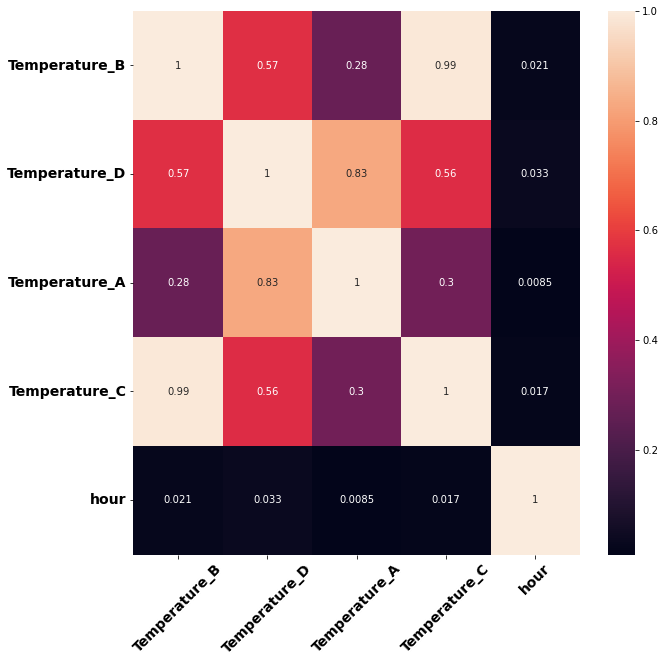

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(10,10))
sns.heatmap(DF.corr().abs(), annot = True)
plt.yticks(fontsize = 14, fontweight = "bold", rotation = 0)
plt.xticks(fontsize = 14, fontweight = "bold", rotation = 45)

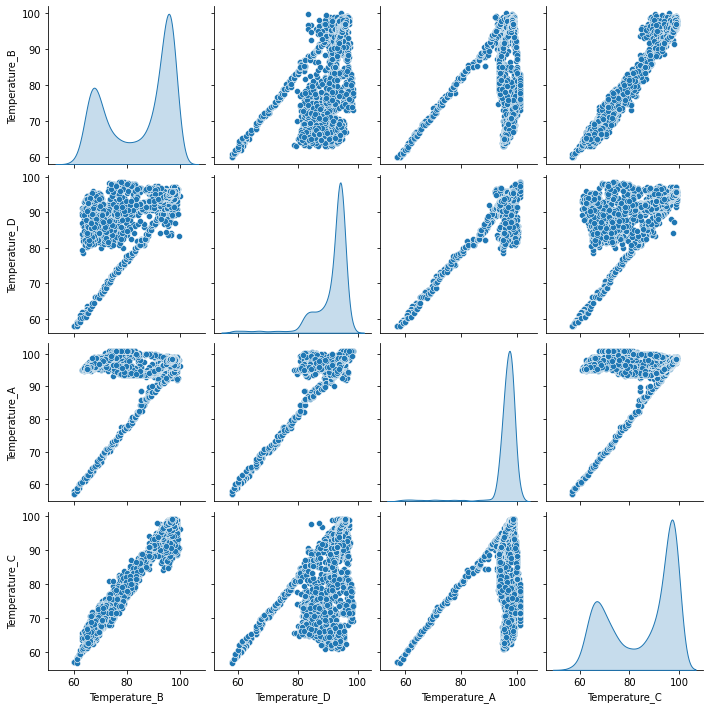

In [ ]:

sns.pairplot(DF[DF.columns[:-1]],diag_kind = 'kde')